In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import linprog

np.set_printoptions(precision = 3)
angles = pd.read_csv('a4q2_headingangles.csv',header = None)
T = 100
vmin = 0.01
xf = 3
yf = 4
x0 = 0
y0 = 0

       0       1       2       3       4       5       6       7       8   \
0  1.5708  1.5708  1.5707  1.5704  1.5698  1.5689  1.5676  1.5658  1.5635   

       9   ...        90        91       92        93        94        95  \
0  1.5605  ...  0.010251  0.007316  0.00498  0.003187  0.001873  0.000974   

         96        97        98  99  
0  0.000417  0.000126  0.000016   0  

[1 rows x 100 columns]
0


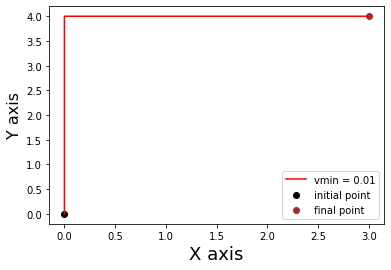

[2.000e+00 2.000e+00 6.399e-08 1.288e-08 2.563e-09 1.053e-09 6.210e-10
 4.231e-10 3.161e-10 2.485e-10 2.060e-10 1.750e-10 1.518e-10 1.333e-10
 1.180e-10 1.048e-10 9.330e-11 8.308e-11 7.404e-11 6.587e-11 5.860e-11
 5.210e-11 4.641e-11 4.140e-11 3.704e-11 3.327e-11 3.004e-11 2.728e-11
 2.494e-11 2.298e-11 2.135e-11 2.000e-11 1.889e-11 1.798e-11 1.725e-11
 1.667e-11 1.622e-11 1.587e-11 1.561e-11 1.542e-11 1.530e-11 1.522e-11
 1.518e-11 1.517e-11 1.518e-11 1.520e-11 1.523e-11 1.526e-11 1.529e-11
 1.531e-11 1.533e-11 1.534e-11 1.535e-11 1.535e-11 1.536e-11 1.537e-11
 1.539e-11 1.543e-11 1.549e-11 1.559e-11 1.573e-11 1.593e-11 1.619e-11
 1.654e-11 1.697e-11 1.752e-11 1.819e-11 1.901e-11 2.000e-11 2.118e-11
 2.259e-11 2.426e-11 2.622e-11 2.851e-11 3.118e-11 3.428e-11 3.789e-11
 4.207e-11 4.694e-11 5.265e-11 5.943e-11 6.761e-11 7.769e-11 9.042e-11
 1.070e-10 1.291e-10 1.593e-10 2.014e-10 2.603e-10 3.420e-10 4.516e-10
 5.881e-10 7.331e-10 8.324e-10 7.761e-10 4.278e-10 2.875e-10 3.409e-08
 1.162

In [19]:
heading_angles = angles.to_numpy()
heading_angles = heading_angles.reshape(1,100)
heading_angles[0,T-1] = 0
#print(heading_angles)
A = np.vstack((np.cos(heading_angles),np.sin(heading_angles)))
#A = np.round_(A,3)
#print(A)

c = -1*np.ones((1,T))
 
b = np.array([xf-x0,yf-y0])
b = b.reshape(2,1)
res = linprog(c, A_eq=A, b_eq=b, bounds= (vmin,None))
v = res.x
x = np.zeros(T+1)
y = np.zeros(T+1)
x[0] = x0
y[0] = y0

fig = plt.figure()
plt.xlabel('X axis', fontsize=18)
plt.ylabel('Y axis', fontsize=16)
plt.scatter(x0,y0,color = 'black',label = 'initial point')
plt.scatter(xf,yf,color = 'brown',label = 'final point')

for i in range(0,T):
    x[i+1] = x[i] + v[i]*math.cos(heading_angles[0,i])
    y[i+1] = y[i] + v[i]*math.sin(heading_angles[0,i])
    #plt.scatter(x[i+1],y[i+1],color = 'black')
plt.plot(x,y,color = 'r',label = 'vmin = 0.01')
plt.legend()
plt.show()

print(res.x)